In [1]:
#Libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

#import classification modules
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

#import performance scores
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import f1_score
from sklearn.metrics import auc
warnings.filterwarnings('ignore')

Functions

In [2]:

# Validation metrics for classification
def validationmetrics(model, testX, testY, verbose=True):   
    predictions = model.predict(testX)
    
    if model.__class__.__module__.startswith('lightgbm'):
        for i in range(0, predictions.shape[0]):
            predictions[i]= 1 if predictions[i] >= 0.5 else 0
    
    #Accuracy
    accuracy = accuracy_score(testY, predictions)*100
    
    #Precision
    precision = precision_score(testY, predictions, pos_label=1, labels=[0,1])*100
    
    #Recall
    recall = recall_score(testY, predictions,pos_label=1,labels=[0,1])*100
    
    #get FPR (specificity) and TPR (sensitivity)
    fpr , tpr, _ = roc_curve(testY, predictions)
    
    #AUC
    auc_val = auc(fpr, tpr)
    
    #F-Score
    f_score = f1_score(testY, predictions)
    
    if verbose:
        print("Prediction Vector: \n", predictions)
        print("\n Accuracy: \n", accuracy)
        print("\n Precision of event Happening: \n", precision)
        print("\n Recall of event Happening: \n", recall)
        print("\n AUC: \n",auc_val)
        print("\n F-Score:\n", f_score)
        #confusion Matrix
        print("\n Confusion Matrix: \n", confusion_matrix(testY, predictions,labels=[0,1]))
    
    res_map = {
                "accuracy": accuracy,
                "precision": precision,
                "recall": recall,
                "auc_val": auc_val,
                "f_score": f_score,
                "model_obj": model
              }
    return res_map




# Helper function to get fetaure importance metrics via Random Forest Feature Selection (RFFS)
def RFfeatureimportance(df, trainX, testX, trainY, testY, trees=35, random=None):
    clf  = RandomForestClassifier(n_estimators=trees, random_state=random)
    clf.fit(trainX,trainY)
    #validationmetrics(clf,testX,testY)
    res = pd.Series(clf.feature_importances_, index=df.columns.values).sort_values(ascending=False)*100
    print(res)
    return res



#classification algorithm
# Classification Algorithms
def LogReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf  = LogisticRegression()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)


def GadientBoosting(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = GradientBoostingClassifier()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def AdaBoost(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = AdaBoostClassifier(n_estimators=100, random_state=0)
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def SVM(trainX, testX, trainY, testY, svmtype="SVC", verbose=True, clf=None):
    # for one vs all
    if not clf:
        if svmtype == "Linear":
            clf = svm.LinearSVC()
        else:
            clf = svm.SVC()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def RandomForest(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf  = RandomForestClassifier()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def KNN(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf  = KNeighborsClassifier()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)


def XgBoost(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = XGBClassifier(random_state=1,learning_rate=0.01)
    clf.fit(trainX,trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def NaiveBayes(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = GaussianNB()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def MultiLayerPerceptron(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = MLPClassifier(hidden_layer_sizes=5)
    clf.fit(trainX,trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def DecisionTree(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = DecisionTreeClassifier()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)


# Helper function to run all algorithms provided in algo_list over given dataframe, without cross validation
# By default it will run all supported algorithms 

#Train Test Split: splitting manually
def traintestsplit(df,split,random=None, label_col=''):
    #make a copy of the label column and store in y
    y = df[label_col].copy()
    
    #now delete the original
    X = df.drop(label_col,axis=1)
    
    #manual split
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    return X, trainX, testX, trainY, testY
    
#helper function which only splits into X and y
def XYsplit(df, label_col):
    y = df[label_col].copy()
    X = df.drop(label_col,axis=1)
    return X,y






In [3]:
try:
    from xgboost import XGBClassifier
except:
    print("Failed to import xgboost, make sure you have xgboost installed")
    print("Use following command to install it: pip install xgboost")
    XGBClassifier = None

In [4]:
#loading data
hd_df = pd.read_csv('heart.csv')

In [5]:
hd_df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
#printing shape of dataset
hd_df.shape

(1025, 14)

In [7]:
#checking data types of each column
hd_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Preprocessing

Checking null or missing values

In [8]:
nullval = hd_df.isnull().sum()

In [9]:
#checking missing values
#columns that have null values greater than 5% -> It gives percentage
percent_missing = hd_df.isnull().sum() * 100 / len(hd_df)


#no of missing
num_missing = hd_df.isnull().sum()

#sorting values in descending order
percent_missing = percent_missing.sort_values(ascending=False)

#inserting in percentages into new dataframe
missing_value_df = pd.DataFrame({'percent_missing': percent_missing, 'Num_missing_val': num_missing})

missing_value_df = missing_value_df.sort_values(by=['percent_missing'],ascending=False)

In [10]:
missing_value_df[percent_missing>5]

,percent_missing,Num_missing_val


In [11]:
missing_value_df[percent_missing>15]

,percent_missing,Num_missing_val


Checking duplicate values

In [12]:
hd_df[hd_df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [13]:
#deleting duplicate entries
hd_df= hd_df.drop_duplicates(keep='first')

checking outliers using Isolation forest technique

In [14]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(hd_df)


IsolationForest(contamination=0.1, n_estimators=50)

In [15]:
hd_df['scores']=model.decision_function(hd_df[hd_df.columns[0:14]])
hd_df['anomaly']=model.predict(hd_df[hd_df.columns[0:14]])
hd_df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,scores,anomaly
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0.065000,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0.013022,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0.033765,1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0.083573,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,-0.035869,-1


In [16]:
#Print Anomalies
anomaly=hd_df.loc[hd_df['anomaly']==-1]
anomaly_index=list(anomaly.index)
anomaly.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,scores,anomaly
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,-0.035869,-1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,-0.098886,-1
11,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0,-0.029541,-1


EDA

Information about features

In [17]:
#for understanding each column better
information = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]
for i in range(len(information)):
    print(hd_df.columns[i]+":\t\t\t"+information[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


Analyzing target variable

1    164
0    138
Name: target, dtype: int64


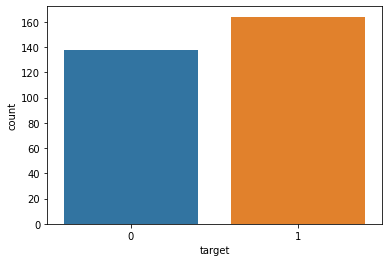

In [18]:
y = hd_df["target"]
sns.countplot(y)
tar_value = hd_df.target.value_counts()
print(tar_value)

In [19]:
#checking the percentage of patients with and without heart disease 
print("Percentage of patience without heart problems: target 0: "+str(round(tar_value[0]*100/303,2)))
print("Percentage of patience with heart problems: target 1: "+str(round(tar_value[1]*100/303,2)))

Percentage of patience without heart problems: target 0: 45.54
Percentage of patience with heart problems: target 1: 54.13


Distribution of all columns / features

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>,
        <AxesSubplot:title={'center':'scores'}>,
        <AxesSubplot:title={'center':'anomaly'}>]], dtype=object)

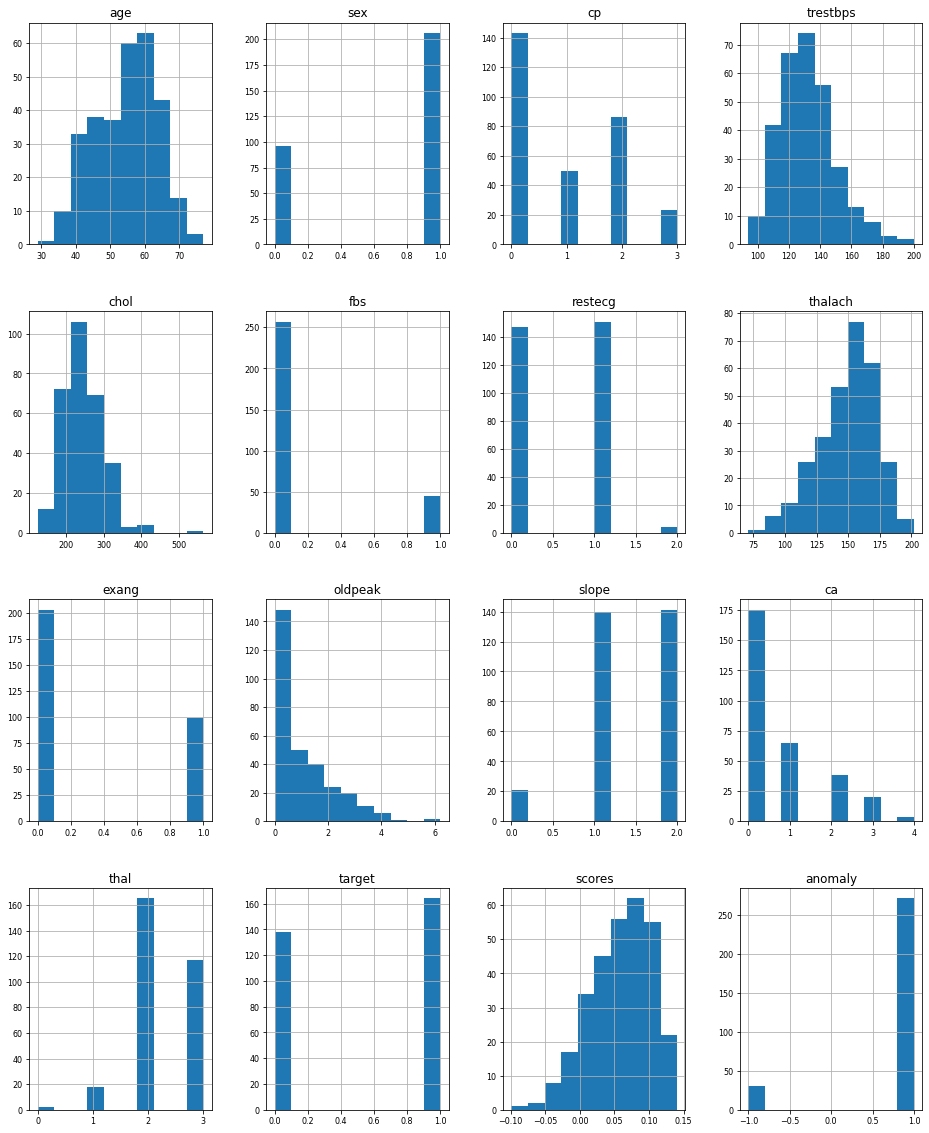

In [20]:
#distribution of each column
hd_df.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

Analyzing Gender Column

Gender columns shows, there are 96 female patient's record and 206 males records in dataset

In [21]:
hd_df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

In [22]:
#gender wise distribution of disease
hd_df.groupby(['sex', 'target'])['sex'].count()

sex  target
0    0          24
     1          72
1    0         114
     1          92
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

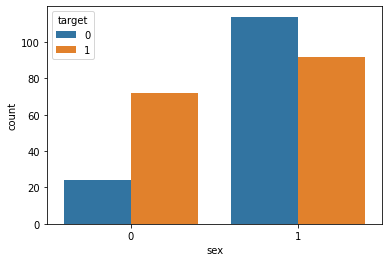

In [23]:
sns.countplot(data=hd_df, x='sex', hue='target')


Above graph demonstrate that heart disease is more common in males than females, 0 shows female and 1 shows male. 
males are more likely to have heart problem than females

Analyzing Chest Pain Feature

In [24]:
#group wise cp with target feature
hd_df.groupby(['cp', 'target'])['cp'].count()

cp  target
0   0         104
    1          39
1   0           9
    1          41
2   0          18
    1          68
3   0           7
    1          16
Name: cp, dtype: int64

<AxesSubplot:xlabel='cp', ylabel='count'>

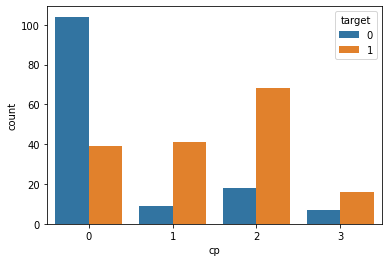

In [25]:
#chest pain wise distribution of target data
sns.countplot(data=hd_df, x='cp', hue='target')

Above graph shows that the chest pain of type 2 are more likely to have heart disease and type 3 are less likely to have heart disease.

Analyzing Slope feature

<AxesSubplot:xlabel='slope', ylabel='count'>

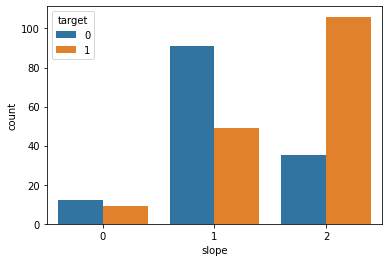

In [26]:
sns.countplot(data=hd_df, x='slope', hue='target')

From above graph, it is observed that slop 2 causes more chest pain than 0 and 1

Analyzing Thal feature

In [27]:
hd_df['thal'].value_counts

<bound method IndexOpsMixin.value_counts of 0      3
1      3
2      3
3      3
4      2
      ..
723    2
733    2
739    3
843    2
878    3
Name: thal, Length: 302, dtype: int64>

<AxesSubplot:xlabel='thal', ylabel='count'>

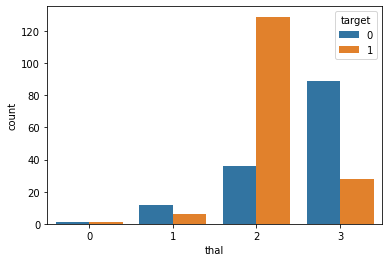

In [28]:
sns.countplot(data=hd_df, x='thal', hue='target')

Above graph shows that patient's with thal 2 are more likely have heart disease and there are very few patient with 0 record.

Analyzing Vessel (CA) feature

<AxesSubplot:xlabel='ca', ylabel='count'>

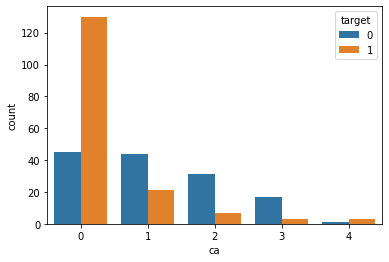

In [29]:
sns.countplot(data=hd_df, x='ca', hue='target')

Analyzing Blood Sugar feature with target variable

In [30]:
hd_df['fbs'].unique

<bound method Series.unique of 0      0
1      1
2      0
3      0
4      1
      ..
723    0
733    0
739    0
843    0
878    0
Name: fbs, Length: 302, dtype: int64>

<AxesSubplot:xlabel='fbs', ylabel='count'>

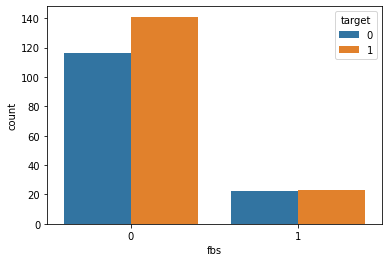

In [31]:
sns.countplot(data=hd_df, x='fbs', hue='target')

Above graph shows that patients those have heart disease are less likely to have blood sugar

[Text(0.5, 1.0, 'Distribution of Fasting Blood Sugar')]

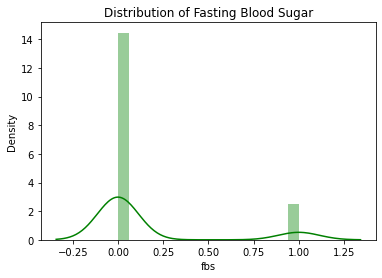

In [32]:
#sns.countplot(data=hd_df, x='chol', hue='target')
sns.distplot(hd_df['fbs'], color='green').set(title='Distribution of Fasting Blood Sugar')

cholestrol level with target variable

[Text(0.5, 1.0, 'Distribution of Chelestrol Level')]

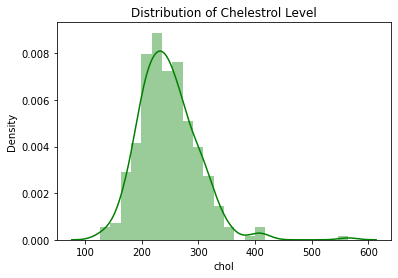

In [33]:
#sns.countplot(data=hd_df, x='chol', hue='target')
sns.distplot(hd_df['chol'], color='green').set(title='Distribution of Chelestrol Level')

Age feature distribution

[Text(0.5, 1.0, 'Distribution of Age')]

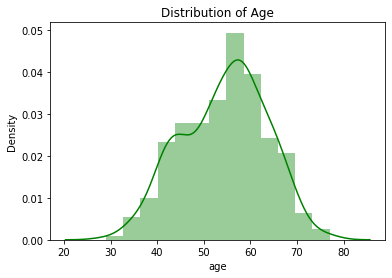

In [34]:
sns.distplot(hd_df['age'], color='green').set(title='Distribution of Age')

Blood Pressure

[Text(0.5, 1.0, 'Distribution of Resting Blood Pressure')]

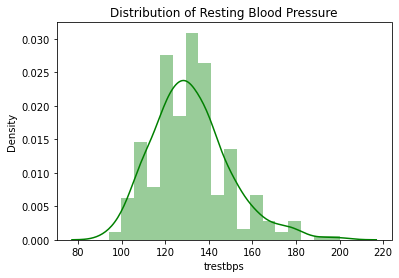

In [35]:
sns.distplot(hd_df['trestbps'], color="green").set(title='Distribution of Resting Blood Pressure')

Checking Correlation

In [36]:
cor = hd_df.corr()
cor

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,scores,anomaly
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476,-0.294073,-0.138856
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609,0.080666,0.143994
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080,-0.006640,0.030400
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269,-0.332665,-0.275220
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437,-0.180542,-0.173258
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826,-0.456570,-0.379330
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874,0.062189,0.006673
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955,0.230633,0.079042
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601,-0.263965,-0.112440
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146,-0.401689,-0.321471


<AxesSubplot:>

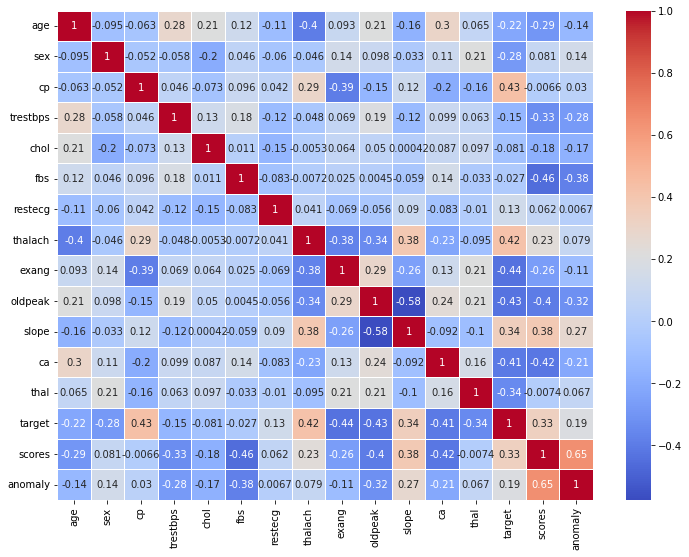

In [37]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(hd_df.corr(),annot=True,cmap='coolwarm',linewidths=.5)

Checking correlation with target variable only

In [38]:
corr = hd_df[hd_df.columns[1:]].corr()['target']
corr = corr.sort_values(ascending = False)
#corr.nlargest(11)
corr

target      1.000000
cp          0.432080
thalach     0.419955
slope       0.343940
scores      0.331626
anomaly     0.193490
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64

Scaling Features

In [39]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
hd_df[columns_to_scale] = standardScaler.fit_transform(hd_df[columns_to_scale])

Splitting data 

In [40]:
from sklearn.model_selection import train_test_split

X = hd_df.drop("target",axis=1)
y = hd_df["target"]

#X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.20,random_state=0)

Random Oversampling for class imbalance problem

In [41]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(X_over,y_over,test_size=0.20,random_state=0)

In [43]:
print(X_train.shape)
print(X_test.shape)

(262, 15)
(66, 15)


In [44]:
print(Y_train.shape)
print(Y_test.shape)

(262,)
(66,)


Feature Selection using Random Forest

In [46]:
threshold = 5
df_cpy = hd_df.copy()
df_cpy, trainX, testX, trainY, testY = traintestsplit(df_cpy, 0.2, 91, label_col='target')
res = RFfeatureimportance(df_cpy, trainX, testX, trainY, testY,
                              trees=10, regression=False)

impftrs = list(res[res > threshold].keys())
    
print ("Selected Features =" + str(impftrs))

cp          14.072698
ca          11.738359
scores      11.541804
thal         9.609742
chol         9.022854
age          8.540826
oldpeak      7.986626
thalach      6.906961
slope        5.012212
trestbps     4.321028
exang        3.821016
sex          3.662627
restecg      2.026322
anomaly      1.129202
fbs          0.607724
dtype: float64
Selected Features =['cp', 'ca', 'scores', 'thal', 'chol', 'age', 'oldpeak', 'thalach', 'slope']


In [47]:
SelectedFeatures =['thalach', 'ca', 'thal', 'cp', 'age', 'oldpeak', 'slope', 'trestbps', 'sex']

In [48]:
X_train = X_train[SelectedFeatures]
X_test = X_test[SelectedFeatures]

Feature selection using Lasso

In [49]:
# fit and apply the transform
X_over, y_over 

(          age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
 0   -0.267966    1   0 -0.376556 -0.667728    0        1  0.806035      0   
 1   -0.157260    1   0  0.478910 -0.841918    1        0  0.237495      1   
 2    1.724733    1   0  0.764066 -1.403197    0        1 -1.074521      1   
 3    0.728383    1   0  0.935159 -0.841918    0        1  0.499898      0   
 4    0.839089    0   0  0.364848  0.919336    1        1 -1.905464      0   
 ..        ...  ...  ..       ...       ...  ...      ...       ...    ...   
 323  0.617678    0   0  1.049221  0.222576    0        0  0.324963      0   
 324 -0.157260    1   0  0.478910 -0.841918    1        0  0.237495      1   
 325  0.396267    0   1  0.250786  1.403197    1        0  0.106294      0   
 326 -0.932199    1   0  0.478910  1.248361    0        1 -1.293190      1   
 327  1.281911    1   1  1.619532 -0.009677    0        1 -1.293190      1   
 
       oldpeak  slope  ca  thal    scores  anomaly  
 0   -0.0

Random Forest

In [50]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
lasso_model = Lasso()

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sc = scaler.fit_transform(X_over)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y_over, test_size=0.33, random_state=42)

In [53]:
param = {
    'alpha':[.00001, 0.0001,0.001, 0.01],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'positive':[True,False],
    'selection':['cyclic','random'],
    }

In [54]:
# define search
search = GridSearchCV(lasso_model, param, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X_sc, y_over)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.2854357305496786
Best Hyperparameters: {'alpha': 1e-05, 'fit_intercept': True, 'normalize': False, 'positive': False, 'selection': 'cyclic'}


In [55]:
lasso_model = Lasso(alpha=1e-05,fit_intercept= True, normalize = True, positive= False, selection = 'cyclic')

In [56]:
X_over = X_over.drop('scores',1)
X_over = X_over.drop('anomaly',1)

In [57]:
alphas = [1e-05, .5, 10]
# Create an empty data frame
df = pd.DataFrame()
    
    # Create a column of feature names
df['Feature Name'] = hd_df.columns[0:13]
    
    # For each alpha value in the list of alpha values,
for alpha in alphas:
    # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha=alpha)
        
        # Fit the lasso regression
        lasso.fit(X_over, y_over)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_

df

,Feature Name,Alpha = 0.000010,Alpha = 0.500000,Alpha = 10.000000
0,age,-0.011924,-0.0,-0.0
1,sex,-0.184807,-0.0,-0.0
2,cp,0.119876,0.0,0.0
3,trestbps,-0.031154,-0.0,-0.0
4,chol,-0.014279,-0.0,-0.0
5,fbs,0.011065,-0.0,-0.0
6,restecg,0.044118,0.0,0.0
7,thalach,0.056524,0.0,0.0
8,exang,-0.133841,-0.0,-0.0
9,oldpeak,-0.056400,-0.0,-0.0


In [58]:
X_train,X_test,Y_train,Y_test = train_test_split(X_over,y_over,test_size=0.20,random_state=0)

In [59]:
max_accuracy = 0
for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [60]:
validationmetrics(rf, X_test, Y_test, verbose=True)

Prediction Vector: 
 [1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1
 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1]

 Accuracy: 
 89.39393939393939

 Precision of event Happening: 
 88.23529411764706

 Recall of event Happening: 
 90.9090909090909

 AUC: 
 0.8939393939393939

 F-Score:
 0.8955223880597014

 Confusion Matrix: 
 [[29  4]
 [ 3 30]]


{'accuracy': 89.39393939393939,
 'precision': 88.23529411764706,
 'recall': 90.9090909090909,
 'auc_val': 0.8939393939393939,
 'f_score': 0.8955223880597014,
 'model_obj': RandomForestClassifier(random_state=38)}

KNN

In [61]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
validationmetrics(knn, X_test, Y_test, verbose=True)

Prediction Vector: 
 [1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1
 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1]

 Accuracy: 
 89.39393939393939

 Precision of event Happening: 
 86.11111111111111

 Recall of event Happening: 
 93.93939393939394

 AUC: 
 0.893939393939394

 F-Score:
 0.8985507246376813

 Confusion Matrix: 
 [[28  5]
 [ 2 31]]


{'accuracy': 89.39393939393939,
 'precision': 86.11111111111111,
 'recall': 93.93939393939394,
 'auc_val': 0.893939393939394,
 'f_score': 0.8985507246376813,
 'model_obj': KNeighborsClassifier()}

Logistic Regression

In [62]:
Lr = LogisticRegression( solver='lbfgs')
Lr.fit(X_train,Y_train)
validationmetrics(Lr, X_test, Y_test, verbose=True)

Prediction Vector: 
 [1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1
 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1]

 Accuracy: 
 83.33333333333334

 Precision of event Happening: 
 80.55555555555556

 Recall of event Happening: 
 87.87878787878788

 AUC: 
 0.8333333333333334

 F-Score:
 0.8405797101449276

 Confusion Matrix: 
 [[26  7]
 [ 4 29]]


{'accuracy': 83.33333333333334,
 'precision': 80.55555555555556,
 'recall': 87.87878787878788,
 'auc_val': 0.8333333333333334,
 'f_score': 0.8405797101449276,
 'model_obj': LogisticRegression()}

SVM

In [63]:
from sklearn import svm

sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
validationmetrics(sv, X_test, Y_test, verbose=True)

Prediction Vector: 
 [1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1
 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1]

 Accuracy: 
 84.84848484848484

 Precision of event Happening: 
 79.48717948717949

 Recall of event Happening: 
 93.93939393939394

 AUC: 
 0.8484848484848485

 F-Score:
 0.8611111111111112

 Confusion Matrix: 
 [[25  8]
 [ 2 31]]


{'accuracy': 84.84848484848484,
 'precision': 79.48717948717949,
 'recall': 93.93939393939394,
 'auc_val': 0.8484848484848485,
 'f_score': 0.8611111111111112,
 'model_obj': SVC(kernel='linear')}

XGBoost

In [64]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(eval_metric="logloss", random_state=42, learning_rate=0.2)
xgb_model.fit(X_train, Y_train)
validationmetrics(xgb_model, X_test, Y_test, verbose=True)

Prediction Vector: 
 [0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0
 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1]

 Accuracy: 
 86.36363636363636

 Precision of event Happening: 
 87.5

 Recall of event Happening: 
 84.84848484848484

 AUC: 
 0.8636363636363638

 F-Score:
 0.8615384615384615

 Confusion Matrix: 
 [[29  4]
 [ 5 28]]


{'accuracy': 86.36363636363636,
 'precision': 87.5,
 'recall': 84.84848484848484,
 'auc_val': 0.8636363636363638,
 'f_score': 0.8615384615384615,
 'model_obj': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
               interaction_constraints='', learning_rate=0.2, max_delta_step=0,
               max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=4,
               num_parallel_tree=1, predictor='auto', random_state=42,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None)}

Adaboost

In [65]:
def AdaBoost(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = AdaBoostClassifier(n_estimators=50, random_state=42, learning_rate=0.1)
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

In [66]:
AdaBoost(X_train, X_test, Y_train, Y_test, verbose=True, clf=None)

Prediction Vector: 
 [1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1]

 Accuracy: 
 83.33333333333334

 Precision of event Happening: 
 78.94736842105263

 Recall of event Happening: 
 90.9090909090909

 AUC: 
 0.8333333333333334

 F-Score:
 0.8450704225352113

 Confusion Matrix: 
 [[25  8]
 [ 3 30]]


{'accuracy': 83.33333333333334,
 'precision': 78.94736842105263,
 'recall': 90.9090909090909,
 'auc_val': 0.8333333333333334,
 'f_score': 0.8450704225352113,
 'model_obj': AdaBoostClassifier(learning_rate=0.1, random_state=42)}

Gradient Boosting

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
def GradBoost(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = GradientBoostingClassifier(n_estimators=60, random_state=0)
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

In [68]:
GradBoost(X_train, X_test, Y_train, Y_test, verbose=True, clf=None)

Prediction Vector: 
 [0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1]

 Accuracy: 
 83.33333333333334

 Precision of event Happening: 
 82.35294117647058

 Recall of event Happening: 
 84.84848484848484

 AUC: 
 0.8333333333333334

 F-Score:
 0.8358208955223881

 Confusion Matrix: 
 [[27  6]
 [ 5 28]]


{'accuracy': 83.33333333333334,
 'precision': 82.35294117647058,
 'recall': 84.84848484848484,
 'auc_val': 0.8333333333333334,
 'f_score': 0.8358208955223881,
 'model_obj': GradientBoostingClassifier(n_estimators=60, random_state=0)}

Decision Tree

In [69]:
DecisionTree(X_train, X_test, Y_train, Y_test, verbose=True, clf=None)

Prediction Vector: 
 [1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0
 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1]

 Accuracy: 
 84.84848484848484

 Precision of event Happening: 
 82.85714285714286

 Recall of event Happening: 
 87.87878787878788

 AUC: 
 0.8484848484848485

 F-Score:
 0.8529411764705883

 Confusion Matrix: 
 [[27  6]
 [ 4 29]]


{'accuracy': 84.84848484848484,
 'precision': 82.85714285714286,
 'recall': 87.87878787878788,
 'auc_val': 0.8484848484848485,
 'f_score': 0.8529411764705883,
 'model_obj': DecisionTreeClassifier()}

NaiveBayes Classifier

In [70]:
NaiveBayes(X_train, X_test, Y_train, Y_test, verbose=True, clf=None)

Prediction Vector: 
 [1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1
 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1]

 Accuracy: 
 81.81818181818183

 Precision of event Happening: 
 80.0

 Recall of event Happening: 
 84.84848484848484

 AUC: 
 0.8181818181818182

 F-Score:
 0.823529411764706

 Confusion Matrix: 
 [[26  7]
 [ 5 28]]


{'accuracy': 81.81818181818183,
 'precision': 80.0,
 'recall': 84.84848484848484,
 'auc_val': 0.8181818181818182,
 'f_score': 0.823529411764706,
 'model_obj': GaussianNB()}

Multilayer Perceptron

In [71]:
MultiLayerPerceptron(X_train, X_test, Y_train, Y_test, verbose=True, clf=None)

Prediction Vector: 
 [1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1]

 Accuracy: 
 71.21212121212122

 Precision of event Happening: 
 73.33333333333333

 Recall of event Happening: 
 66.66666666666666

 AUC: 
 0.712121212121212

 F-Score:
 0.6984126984126984

 Confusion Matrix: 
 [[25  8]
 [11 22]]


{'accuracy': 71.21212121212122,
 'precision': 73.33333333333333,
 'recall': 66.66666666666666,
 'auc_val': 0.712121212121212,
 'f_score': 0.6984126984126984,
 'model_obj': MLPClassifier(hidden_layer_sizes=5)}

All Models scores

In [72]:
score_lr = 84
score_svm = 89.3
score_naiv = 78.7
score_rf =  90.9
score_xgb = 84.4
score_adb = 84.8
score_gdb = 84.8
score_dt = 75.7
score_mt = 75.7
scores = [score_lr,score_svm,score_naiv, score_rf,score_dt,score_xgb, score_adb, score_gdb, score_mt]
algorithms = ["LogisticRegression","SupportVectorMachine","NaiveBayes","RandomForest","DecisionTree", "XGBoost","AdaBoost", "GradBoost", "MultilayerPerceptron"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using LogisticRegression is: 84 %
The accuracy score achieved using SupportVectorMachine is: 89.3 %
The accuracy score achieved using NaiveBayes is: 78.7 %
The accuracy score achieved using RandomForest is: 90.9 %
The accuracy score achieved using DecisionTree is: 75.7 %
The accuracy score achieved using XGBoost is: 84.4 %
The accuracy score achieved using AdaBoost is: 84.8 %
The accuracy score achieved using GradBoost is: 84.8 %
The accuracy score achieved using MultilayerPerceptron is: 75.7 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

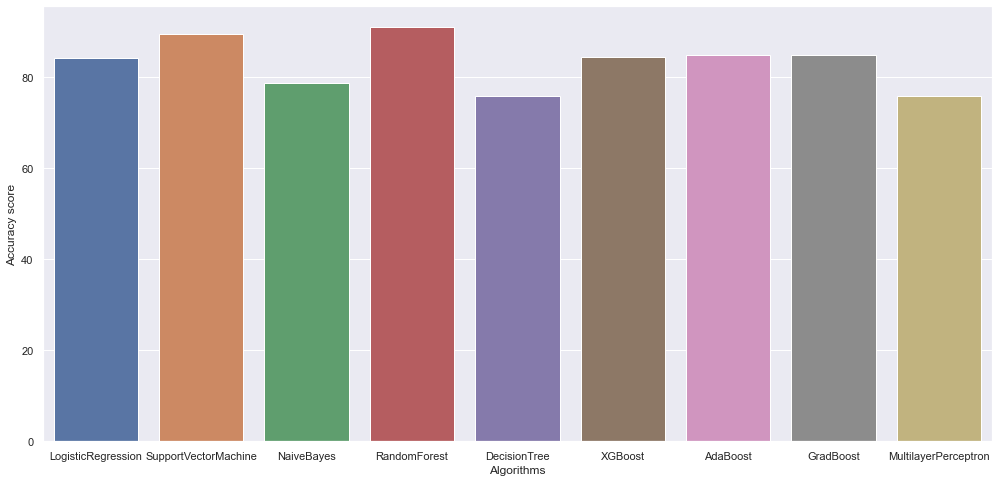

In [73]:
sns.set(rc={'figure.figsize':(17,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

## Deep Learning

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("heart.csv")

In [3]:
dataset["target"].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [4]:
dataset["target"].unique()

array([0, 1], dtype=int64)

In [5]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [6]:
from sklearn.metrics import accuracy_score

## ANN

In [7]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [8]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
26/26 [==============================] - 1s 2ms/step - loss: 29.0442 - accuracy: 0.4939
Epoch 2/300
26/26 [==============================] - 0s 4ms/step - loss: 8.0147 - accuracy: 0.5573
Epoch 3/300
26/26 [==============================] - 0s 3ms/step - loss: 3.2548 - accuracy: 0.6159
Epoch 4/300
26/26 [==============================] - 0s 4ms/step - loss: 2.0855 - accuracy: 0.6537
Epoch 5/300
26/26 [==============================] - 0s 3ms/step - loss: 1.6364 - accuracy: 0.6549
Epoch 6/300
26/26 [==============================] - 0s 4ms/step - loss: 1.3498 - accuracy: 0.6537
Epoch 7/300
26/26 [==============================] - 0s 3ms/step - loss: 1.2289 - accuracy: 0.6512
Epoch 8/300
26/26 [==============================] - 0s 3ms/step - loss: 1.1852 - accuracy: 0.6463
Epoch 9/300
26/26 [==============================] - 0s 4ms/step - loss: 1.0547 - accuracy: 0.6561
Epoch 10/300
26/26 [==============================] - 0s 4ms/step - loss: 0.9949 - accuracy: 0.6732
Epoch 11

26/26 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8341
Epoch 84/300
26/26 [==============================] - 0s 1ms/step - loss: 0.4005 - accuracy: 0.8378
Epoch 85/300
26/26 [==============================] - 0s 1ms/step - loss: 0.3876 - accuracy: 0.8280
Epoch 86/300
26/26 [==============================] - 0s 1ms/step - loss: 0.3976 - accuracy: 0.8268
Epoch 87/300
26/26 [==============================] - 0s 1ms/step - loss: 0.3873 - accuracy: 0.8512
Epoch 88/300
26/26 [==============================] - 0s 1ms/step - loss: 0.3767 - accuracy: 0.8378
Epoch 89/300
26/26 [==============================] - 0s 1ms/step - loss: 0.3692 - accuracy: 0.8549
Epoch 90/300
26/26 [==============================] - 0s 1ms/step - loss: 0.3803 - accuracy: 0.8451
Epoch 91/300
26/26 [==============================] - 0s 1ms/step - loss: 0.3758 - accuracy: 0.8378
Epoch 92/300
26/26 [==============================] - 0s 1ms/step - loss: 0.3900 - accuracy: 0.8341
Epoch 93/300


26/26 [==============================] - 0s 1ms/step - loss: 0.3781 - accuracy: 0.8439
Epoch 165/300
26/26 [==============================] - 0s 1ms/step - loss: 0.3715 - accuracy: 0.8402
Epoch 166/300
26/26 [==============================] - 0s 1ms/step - loss: 0.3922 - accuracy: 0.8317
Epoch 167/300
26/26 [==============================] - 0s 1ms/step - loss: 0.3941 - accuracy: 0.8341
Epoch 168/300
26/26 [==============================] - 0s 1ms/step - loss: 0.3887 - accuracy: 0.8256
Epoch 169/300
26/26 [==============================] - 0s 1ms/step - loss: 0.4630 - accuracy: 0.7902
Epoch 170/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3695 - accuracy: 0.8476
Epoch 171/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8451
Epoch 172/300
26/26 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8159
Epoch 173/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3774 - accuracy: 0.8341
Epoc

26/26 [==============================] - 0s 2ms/step - loss: 0.3784 - accuracy: 0.8378
Epoch 246/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3783 - accuracy: 0.8378
Epoch 247/300
26/26 [==============================] - 0s 1ms/step - loss: 0.3797 - accuracy: 0.8329
Epoch 248/300
26/26 [==============================] - 0s 1ms/step - loss: 0.3918 - accuracy: 0.8293
Epoch 249/300
26/26 [==============================] - 0s 1ms/step - loss: 0.3786 - accuracy: 0.8366
Epoch 250/300
26/26 [==============================] - 0s 1ms/step - loss: 0.3696 - accuracy: 0.8402
Epoch 251/300
26/26 [==============================] - 0s 1ms/step - loss: 0.3787 - accuracy: 0.8402
Epoch 252/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3775 - accuracy: 0.8305
Epoch 253/300
26/26 [==============================] - 0s 1ms/step - loss: 0.3609 - accuracy: 0.8476
Epoch 254/300
26/26 [==============================] - 0s 1ms/step - loss: 0.3868 - accuracy: 0.8280
Epoc

In [9]:
Y_pred_nn = model.predict(X_test)

In [10]:
Y_pred_nn.shape

(205, 1)

In [11]:
rounded = [round(x[0]) for x in Y_pred_nn]
Y_pred_nn = rounded

In [12]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)
print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 85.37 %


## Sequential Model

In [13]:
model = Sequential()
model.add(Dense(30, input_dim=13, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train, epochs=300, verbose=1)

Epoch 1/300
26/26 [==============================] - 0s 1ms/step - loss: 0.7097 - accuracy: 0.5256
Epoch 2/300
26/26 [==============================] - 0s 1ms/step - loss: 0.6547 - accuracy: 0.6244
Epoch 3/300
26/26 [==============================] - 0s 2ms/step - loss: 0.6363 - accuracy: 0.6280
Epoch 4/300
26/26 [==============================] - 0s 1ms/step - loss: 0.6262 - accuracy: 0.6256
Epoch 5/300
26/26 [==============================] - 0s 1ms/step - loss: 0.6107 - accuracy: 0.6732
Epoch 6/300
26/26 [==============================] - 0s 2ms/step - loss: 0.6003 - accuracy: 0.6622
Epoch 7/300
26/26 [==============================] - 0s 2ms/step - loss: 0.5949 - accuracy: 0.6720
Epoch 8/300
26/26 [==============================] - 0s 1ms/step - loss: 0.5974 - accuracy: 0.6622
Epoch 9/300
26/26 [==============================] - 0s 1ms/step - loss: 0.5962 - accuracy: 0.6744
Epoch 10/300
26/26 [==============================] - 0s 2ms/step - loss: 0.5874 - accuracy: 0.6720
Epoch 11/

26/26 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8280
Epoch 84/300
26/26 [==============================] - 0s 1ms/step - loss: 0.4132 - accuracy: 0.8268
Epoch 85/300
26/26 [==============================] - 0s 1ms/step - loss: 0.4084 - accuracy: 0.8195
Epoch 86/300
26/26 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8232
Epoch 87/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8256
Epoch 88/300
26/26 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8159
Epoch 89/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.8305
Epoch 90/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8293
Epoch 91/300
26/26 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8207
Epoch 92/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3899 - accuracy: 0.8268
Epoch 93/300


26/26 [==============================] - 0s 2ms/step - loss: 0.3321 - accuracy: 0.8598
Epoch 165/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3263 - accuracy: 0.8707
Epoch 166/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3224 - accuracy: 0.8598
Epoch 167/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.8537
Epoch 168/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3313 - accuracy: 0.8610
Epoch 169/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3303 - accuracy: 0.8512
Epoch 170/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3361 - accuracy: 0.8476
Epoch 171/300
26/26 [==============================] - 0s 1ms/step - loss: 0.3248 - accuracy: 0.8720
Epoch 172/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3212 - accuracy: 0.8610
Epoch 173/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.8646
Epoc

26/26 [==============================] - 0s 2ms/step - loss: 0.3033 - accuracy: 0.8683
Epoch 246/300
26/26 [==============================] - 0s 2ms/step - loss: 0.2949 - accuracy: 0.8890
Epoch 247/300
26/26 [==============================] - 0s 2ms/step - loss: 0.2878 - accuracy: 0.8780
Epoch 248/300
26/26 [==============================] - 0s 2ms/step - loss: 0.2820 - accuracy: 0.8915
Epoch 249/300
26/26 [==============================] - 0s 2ms/step - loss: 0.2859 - accuracy: 0.8768
Epoch 250/300
26/26 [==============================] - 0s 2ms/step - loss: 0.2866 - accuracy: 0.8866
Epoch 251/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3007 - accuracy: 0.8707
Epoch 252/300
26/26 [==============================] - 0s 2ms/step - loss: 0.2921 - accuracy: 0.8793
Epoch 253/300
26/26 [==============================] - 0s 2ms/step - loss: 0.2831 - accuracy: 0.8854
Epoch 254/300
26/26 [==============================] - 0s 2ms/step - loss: 0.2791 - accuracy: 0.8829
Epoc

In [15]:
Y_pred_seq = model.predict(X_test)

In [16]:
rounded = [round(x[0]) for x in Y_pred_seq]
Y_pred_seq = rounded

In [17]:
score_seq = round(accuracy_score(Y_pred_seq,Y_test)*100,2)
print("The accuracy score achieved using Sequential Model is: "+str(score_seq)+" %")

The accuracy score achieved using Sequential Model is: 88.78 %


## Dense

In [20]:
model = Sequential()
model.add(Dense(30, input_dim = X_train.shape[1], activation='elu'))
model.add(Dense(20, activation='elu'))
model.add(Dense(10, activation='elu'))
model.add(Dense(5, activation='elu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile(loss='logcosh', optimizer='adam', metrics=['accuracy'])

In [23]:
model.fit(X_train,Y_train, epochs=300, verbose=1)

Epoch 1/300
26/26 [==============================] - 0s 3ms/step - loss: 0.0450 - accuracy: 0.8780
Epoch 2/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 0.8841
Epoch 3/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.8963
Epoch 4/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0486 - accuracy: 0.8671
Epoch 5/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9073
Epoch 6/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 0.8976
Epoch 7/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.8988
Epoch 8/300
26/26 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.9085
Epoch 9/300
26/26 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.8915
Epoch 10/300
26/26 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9024
Epoch 11/

26/26 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.8793
Epoch 84/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 0.8976
Epoch 85/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.8634
Epoch 86/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 0.8646
Epoch 87/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0334 - accuracy: 0.9134
Epoch 88/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0367 - accuracy: 0.9061
Epoch 89/300
26/26 [==============================] - 0s 4ms/step - loss: 0.0351 - accuracy: 0.9024
Epoch 90/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0336 - accuracy: 0.9049
Epoch 91/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9085
Epoch 92/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9195
Epoch 93/300


26/26 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9402
Epoch 165/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9402
Epoch 166/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0250 - accuracy: 0.9366
Epoch 167/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 0.9268
Epoch 168/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0292 - accuracy: 0.9244
Epoch 169/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 0.9354
Epoch 170/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9402
Epoch 171/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0253 - accuracy: 0.9378
Epoch 172/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0261 - accuracy: 0.9317
Epoch 173/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0278 - accuracy: 0.9317
Epoc

26/26 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 0.9500
Epoch 246/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.9427
Epoch 247/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 0.9585
Epoch 248/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 0.9610
Epoch 249/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9390
Epoch 250/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0295 - accuracy: 0.9195
Epoch 251/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 0.9341
Epoch 252/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 0.9561
Epoch 253/300
26/26 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9439
Epoch 254/300
26/26 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.9598
Epoc

In [24]:
Y_pred_den = model.predict(X_test)

In [25]:
rounded = [round(x[0]) for x in Y_pred_den]
Y_pred_den = rounded

In [26]:
score_den = round(accuracy_score(Y_pred_den,Y_test)*100,2)
print("The accuracy score achieved using Dense Model is: "+str(score_den)+" %")

The accuracy score achieved using Dense Model is: 93.66 %


In [27]:
scores = [score_den,score_nn,score_seq]
algorithms = ["Dense Model","Artificial Neural Network","Sequential Model"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Dense Model is: 93.66 %
The accuracy score achieved using Artificial Neural Network is: 85.37 %
The accuracy score achieved using Sequential Model is: 88.78 %


c:\users\ali nasir\desktop\heart disease\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

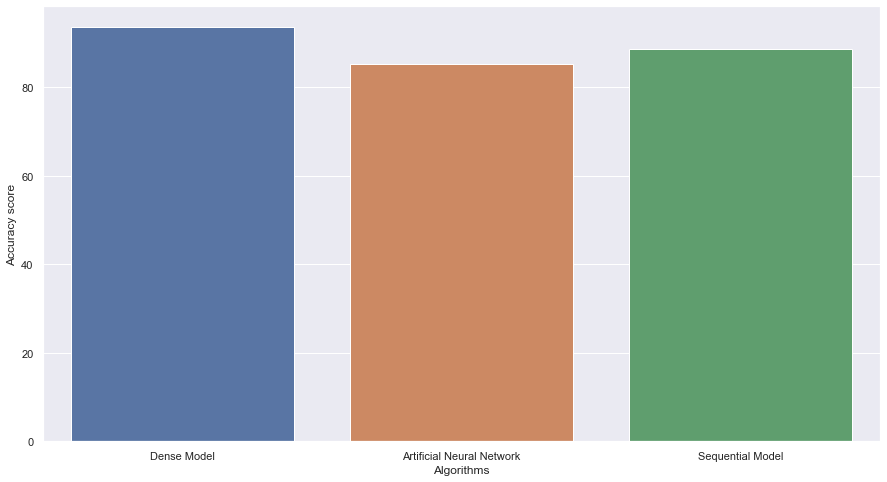

In [29]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)